In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import os
import sys
import ast
import pickle

glp = os.path.abspath("../code")
if not glp in sys.path: sys.path.append( glp )

from global_paths import global_paths

if not global_paths["COBS"] in sys.path: sys.path.append( global_paths["COBS"] )

In [3]:
import cobs
import torch
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import subprocess

In [4]:
import StateUtilities as SU

In [5]:
import visualization_helper_v2 as vh

In [6]:
fig_width = 30

In [7]:
dirnames = ["../checkpoints/b001/",
            "../checkpoints/s110/20210612-1702/",
            "../checkpoints/s110b/20210611-0855/",
            "../checkpoints/s110c/20210613-1606/",
            "../checkpoints/s109/20210611-0855/"]

In [8]:
alldfs = [ vh.convert_sqlite_to_df(dirname) for dirname in dirnames ]

Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.
Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.
Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.
Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.
Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.


In [9]:
q_values = vh.load_and_convert_q_values(dirnames)

No Q-value list found for ../checkpoints/b001/.


In [10]:
vh.get_arguments_overview(dirnames)

b001  \
algorithm                            baseline_rule-based   
ddqn_new                                               0   
lr                                                  0.01   
batch_size                                           128   
lambda_rwd_mstpc                                     0.1   
lambda_rwd_energy                                  5e-06   
reward_function                         sum_energy_mstpc   
energy_cons_in_kWh                                     0   
reward_scale                                         1.0   
reward_offset                                        0.0   
clip_econs_at                                        0.0   
soften_instead_of_clipping                             0   
target_network_update_freq                             3   
epsilon_final_step                                   100   
epsilon_decay_mode                           exponential   
episodes_count                                       100   
agent_network                     2HiddenLayer,Trapezium   
agent_init_gain                                      0.8   
use_layer_normalization                                0   
fewer_q_values                                         0   
agent_w_l2                                         1e-05   
network_storage_frequency                             10   
shared_network_per_agent_class                         0   
model                            Building_5ZoneAirCooled   
single_setpoint_agent_count                          all   
next_occ_horizont                                      0   
eplus_storage_mode                                     0   
rulebased_setpoint_unoccu_delta                      7.0   

                                                                   s110  \
algorithm                                                          ddqn   
ddqn_new                                                              1   
lr                                                                 0.05   
batch_size                                                          256   
lambda_rwd_mstpc                                                   0.06   
lambda_rwd_energy                                                 0.008   
reward_function                                  rulebased_agent_output   
energy_cons_in_kWh                                                    1   
reward_scale                                                        1.0   
reward_offset                                                       0.3   
clip_econs_at                                                     150.0   
soften_instead_of_clipping                                            1   
target_network_update_freq                                            2   
epsilon_final_step                                                22500   
epsilon_decay_mode                                               linear   
episodes_count                                                      150   
agent_network                                    2HiddenLayer,Trapezium   
agent_init_gain                                                     0.7   
use_layer_normalization                                               1   
fewer_q_values                                                        1   
agent_w_l2                                                        1e-06   
network_storage_frequency                                           150   
shared_network_per_agent_class                                        1   
model                            Building_5ZoneAirCooled_SingleSetpoint   
single_setpoint_agent_count                                         all   
next_occ_horizont                                                     2   
eplus_storage_mode                                                    1   
rulebased_setpoint_unoccu_delta                                     7.0   

                                                                  s110b  \
algorithm                                                   

In [11]:
vh.get_runtime_overview_df(alldfs, dirnames)

b001          s110  \
Number of training episodes                      1.0  22500.000000   
Runtime in s                                     0.0  50663.247474   
Runtime in h                                     0.0     14.073124   
Mean episode runtime in s                        0.0      2.251700   
Mean episode runtime during eval. episode in s   0.0      2.363508   
Mean episode runtime after eval. episode in s    NaN      5.835607   
Mean episode runtime in no eval. episode in s    NaN      2.250949   

                                                       s110b         s110c  \
Number of training episodes                     22500.000000  22500.000000   
Runtime in s                                    51402.081453  38176.408067   
Runtime in h                                       14.278356     10.604558   
Mean episode runtime in s                           2.284537      1.696729   
Mean episode runtime during eval. episode in s      2.398142      1.823327   
Mean episode runtime after eval. episode in s       5.965940      5.284537   
Mean episode runtime in no eval. episode in s       2.283775      1.695880   

                                                        s109  
Number of training episodes                      9000.000000  
Runtime in s                                    13783.672697  
Runtime in h                                        3.828798  
Mean episode runtime in s                           1.531519  
Mean episode runtime during eval. episode in s      1.739936  
Mean episode runtime after eval. episode in s       4.758267  
Mean episode runtime in no eval. episode in s       1.530120

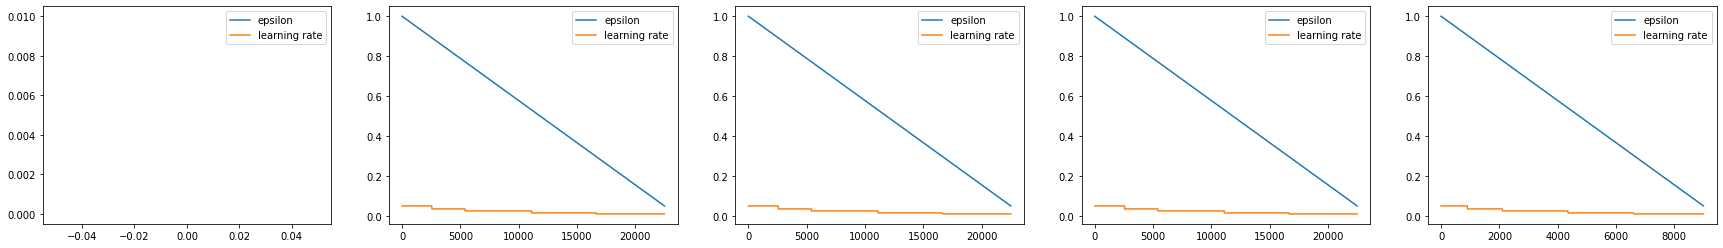

In [12]:
p, _ = vh.complete_plot_epsilon(alldfs, fig_width)
p.show()

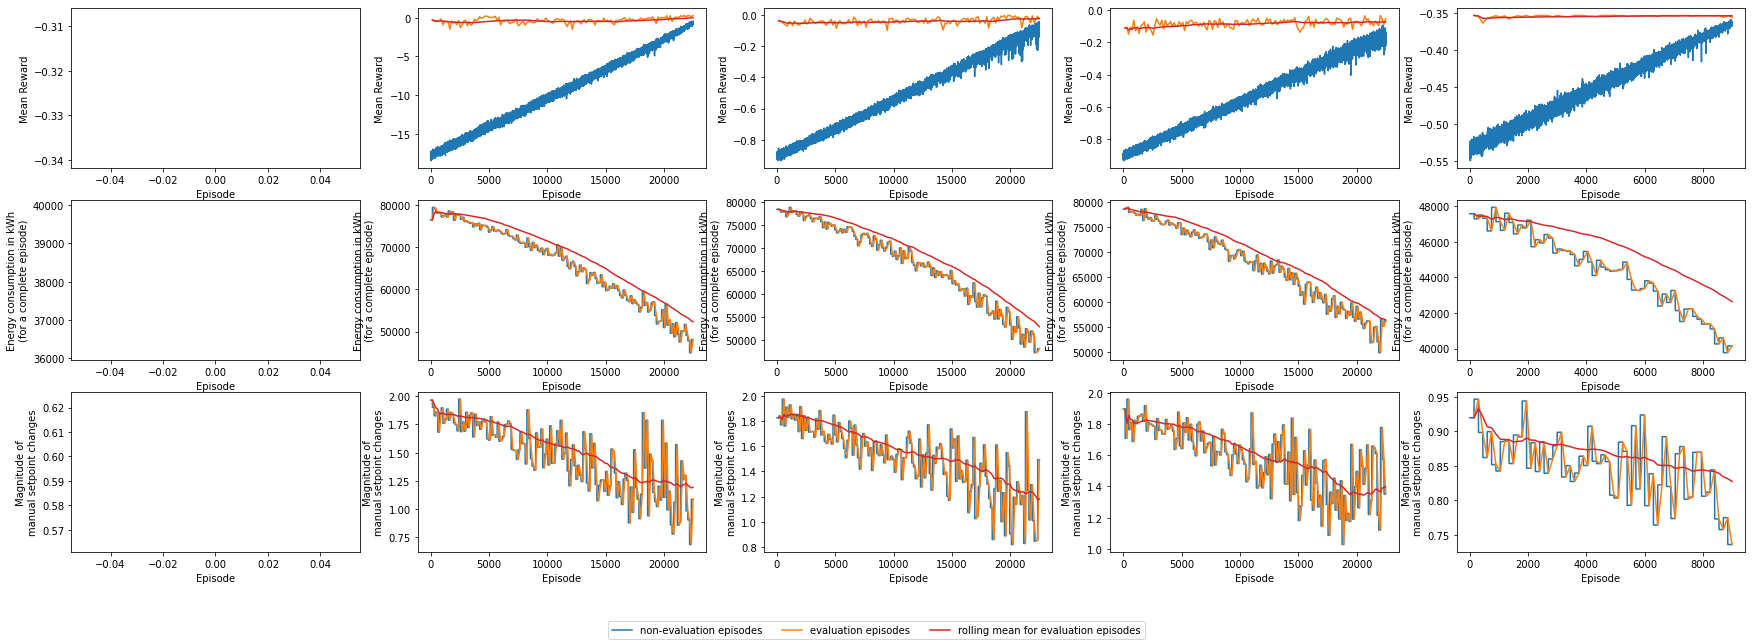

In [13]:
p, _ = vh.complete_plot_reward_stpc_econs(alldfs, fig_width)
p.show()

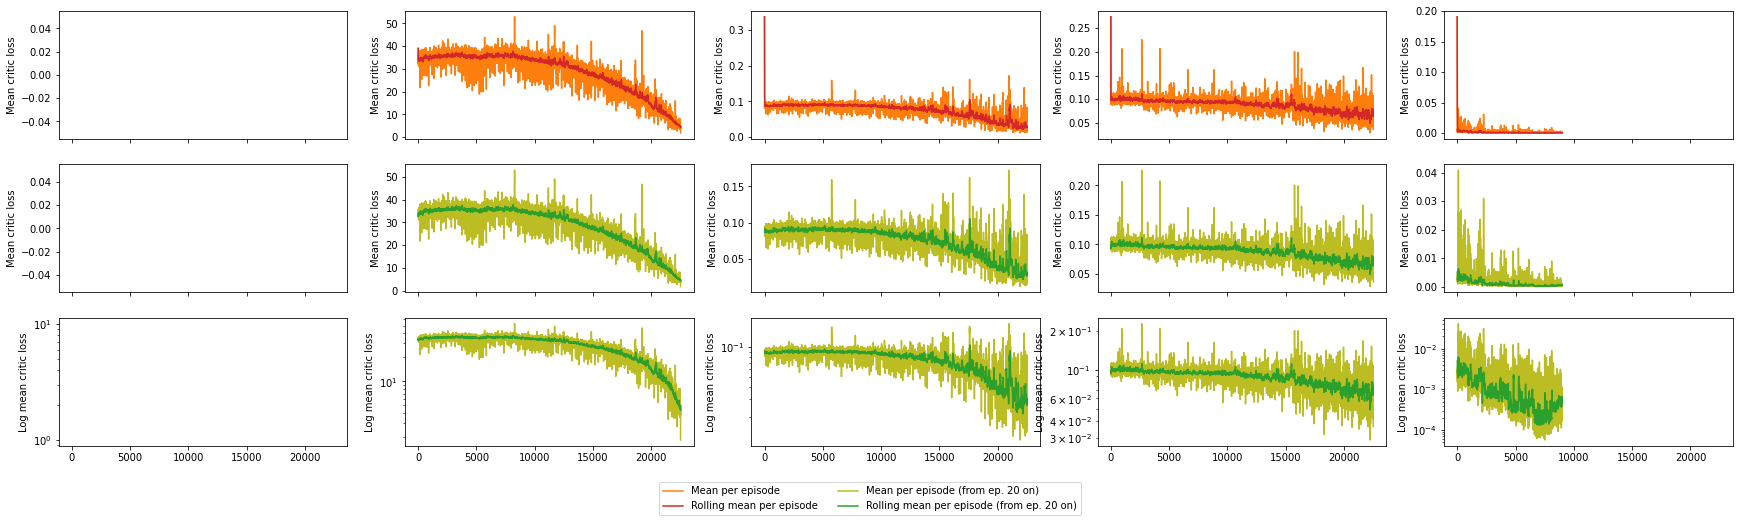

In [14]:
p, _ = vh.complete_plot_losses(alldfs, fig_width, with_agents=False)
p.show()

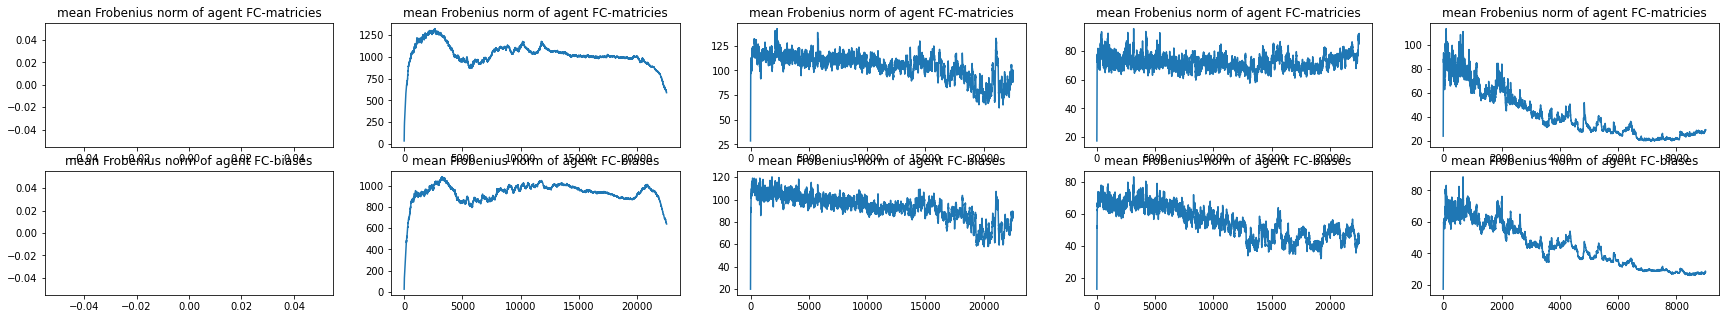

In [15]:
p, _ = vh.complete_plot_frobenius_norms(alldfs, fig_width, with_critics=False)
p.show()

In [16]:
last_available_eval_episodes = vh.compute_last_available_eval_episode(alldfs)

Last available evaluation episode for dfs0:      0
Last available evaluation episode for dfs1:  22499
Last available evaluation episode for dfs2:  22499
Last available evaluation episode for dfs3:  22499
Last available evaluation episode for dfs4:   8999


<h3>Details for one week</h3>

In [17]:
#selected_episodes = [13120 - 1, 14480 - 1, 14480 - 1]
#selected_weeks    = [datetime.datetime(2017, 1, 1), datetime.datetime(2017, 1, 1), datetime.datetime(2017, 1, 1)]

In [18]:
if not "selected_episodes" in locals().keys():
    selected_episodes = last_available_eval_episodes.copy()
if not "selected_weeks" in locals().keys():
    # the start of the evaluation episode
    selected_weeks = [datetime.datetime.strptime(dfs['sees'].iloc[0]["datetime"], "%Y-%m-%d %H:%M:%S")
                      for dfs in alldfs]

subdfs = vh.select_week_and_episode_for_dfs_list(alldfs, selected_episodes, selected_weeks)

In [19]:
vh.print_reward_informations(subdfs, selected_episodes)

First complete week of evaluation episode
For episode     0: Energy consumption:   38042.14 kWh; Sum of setpoint change magnitudes: 426.88118883889297
For episode 22499: Energy consumption:   48085.20 kWh; Sum of setpoint change magnitudes: 781.9786606105661
For episode 22499: Energy consumption:   48146.62 kWh; Sum of setpoint change magnitudes: 1073.1187479330147
For episode 22499: Energy consumption:   56168.50 kWh; Sum of setpoint change magnitudes: 970.9747319384377
For episode  8999: Energy consumption:   40145.74 kWh; Sum of setpoint change magnitudes: 528.878257855366

Mean values for episode ...
...     0: Reward: -0.32392 kWh; Setpoint change magnit.:  0.59372; Energy cons.: 52909.78911
... 22499: Reward:  0.27775 kWh; Setpoint change magnit.:  1.08759; Energy cons.: 66877.89227
... 22499: Reward: -0.02483 kWh; Setpoint change magnit.:  1.49252; Energy cons.: 66963.31614
... 22499: Reward: -0.05132 kWh; Setpoint change magnit.:  1.35045; Energy cons.: 78120.31115
...  8999: R

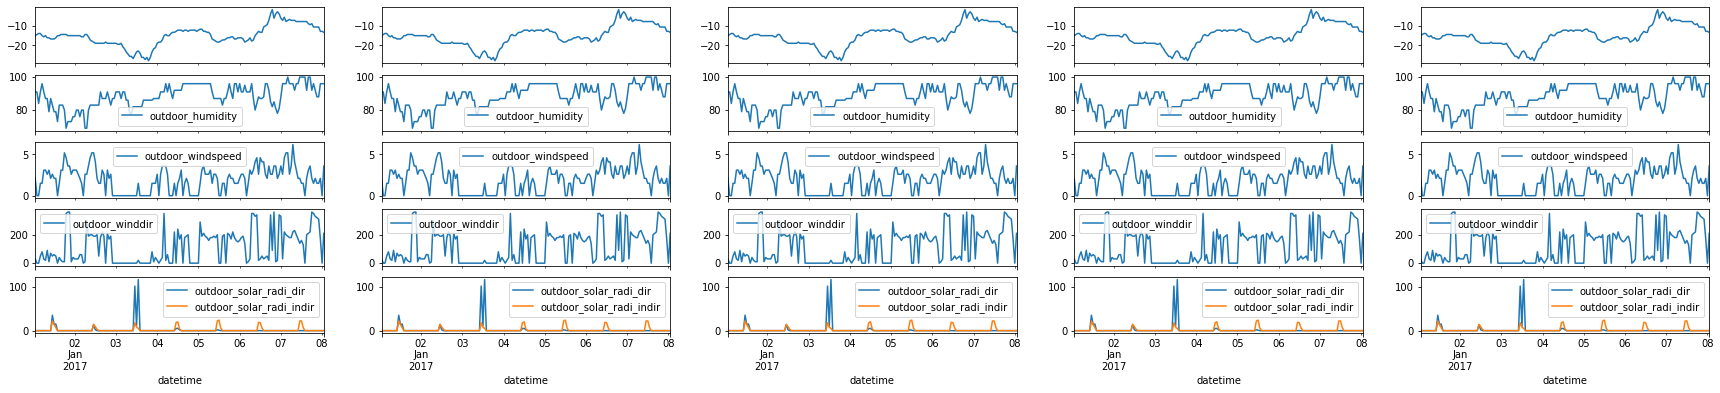

In [20]:
p, _ = vh.complete_plot_weather_information(subdfs, fig_width)
p.show()

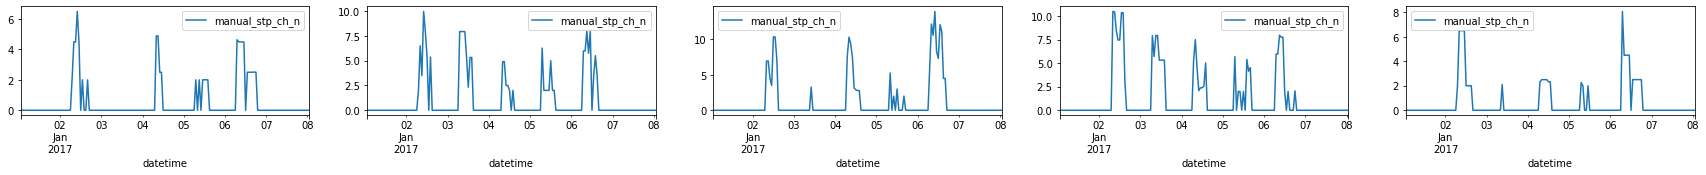

In [21]:
p, _ = vh.complete_plot_number_of_stp_ch(subdfs, fig_width)
p.show()

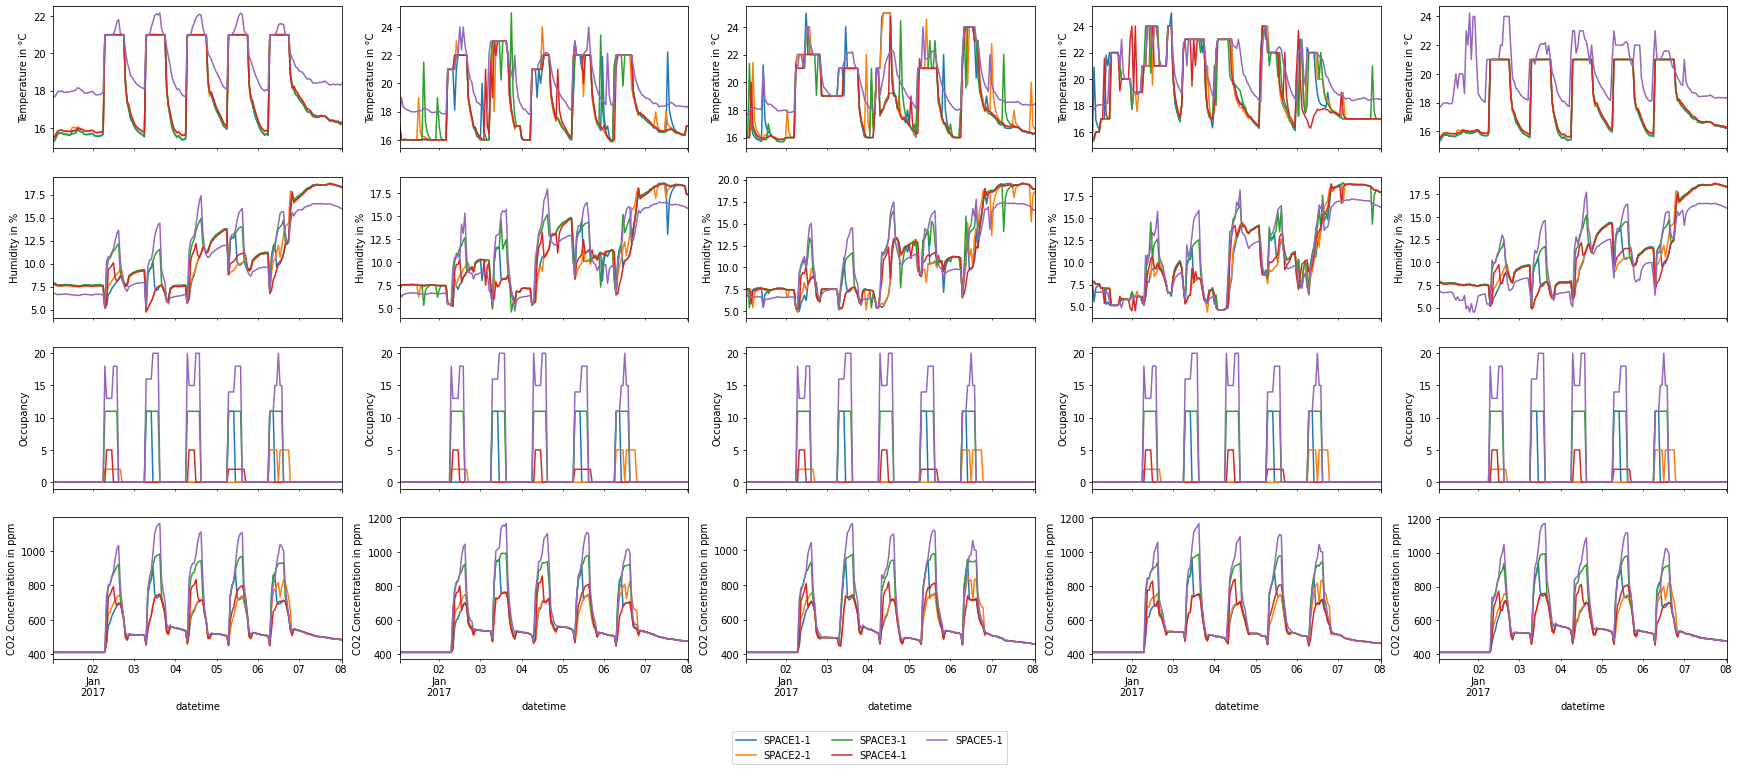

In [22]:
p, _ = vh.complete_plot_room_status(subdfs, fig_width)
p.show()

In [23]:
subdfs_rooms, subdfs_agents = vh.get_available_rooms_and_agents(subdfs)

Available Rooms     in (sub-)dfs0: ['SPACE1-1' 'SPACE2-1' 'SPACE3-1' 'SPACE4-1' 'SPACE5-1']
Available Agent IDs in (sub-)dfs0: {'SPACE1-1': 0, 'SPACE2-1': 1, 'SPACE3-1': 2, 'SPACE4-1': 3, 'SPACE5-1': 4} 

Available Rooms     in (sub-)dfs1: ['SPACE1-1' 'SPACE2-1' 'SPACE3-1' 'SPACE4-1' 'SPACE5-1']
Available Agent IDs in (sub-)dfs1: {'SPACE1-1': 0, 'SPACE2-1': 1, 'SPACE3-1': 2, 'SPACE4-1': 3, 'SPACE5-1': 4} 

Available Rooms     in (sub-)dfs2: ['SPACE1-1' 'SPACE2-1' 'SPACE3-1' 'SPACE4-1' 'SPACE5-1']
Available Agent IDs in (sub-)dfs2: {'SPACE1-1': 0, 'SPACE2-1': 1, 'SPACE3-1': 2, 'SPACE4-1': 3, 'SPACE5-1': 4} 

Available Rooms     in (sub-)dfs3: ['SPACE1-1' 'SPACE2-1' 'SPACE3-1' 'SPACE4-1' 'SPACE5-1']
Available Agent IDs in (sub-)dfs3: {'SPACE1-1': 0, 'SPACE2-1': 1, 'SPACE3-1': 2, 'SPACE4-1': 3, 'SPACE5-1': 4} 

Available Rooms     in (sub-)dfs4: ['SPACE1-1' 'SPACE2-1' 'SPACE3-1' 'SPACE4-1' 'SPACE5-1']
Available Agent IDs in (sub-)dfs4: {'SPACE5-1': 0, 'SPACE4-1': 1, 'SPACE3-1': 2, 'SPACE2

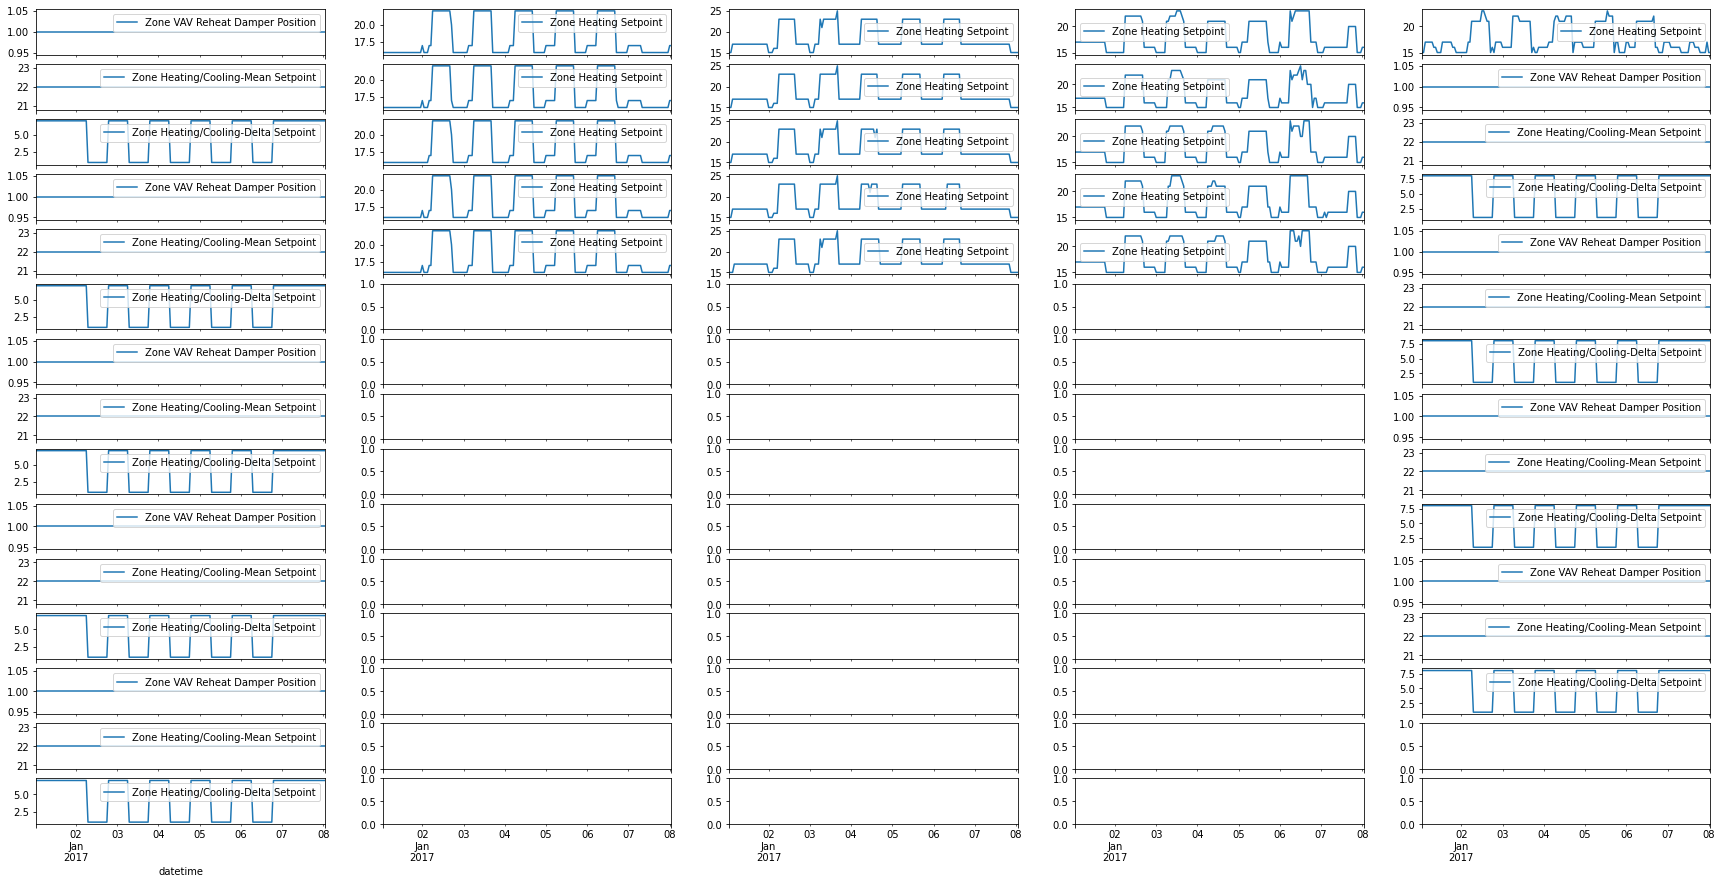

In [24]:
p, _ = vh.complete_plot_all_agent_outputs(subdfs, fig_width, subdfs_agents)
p.show()

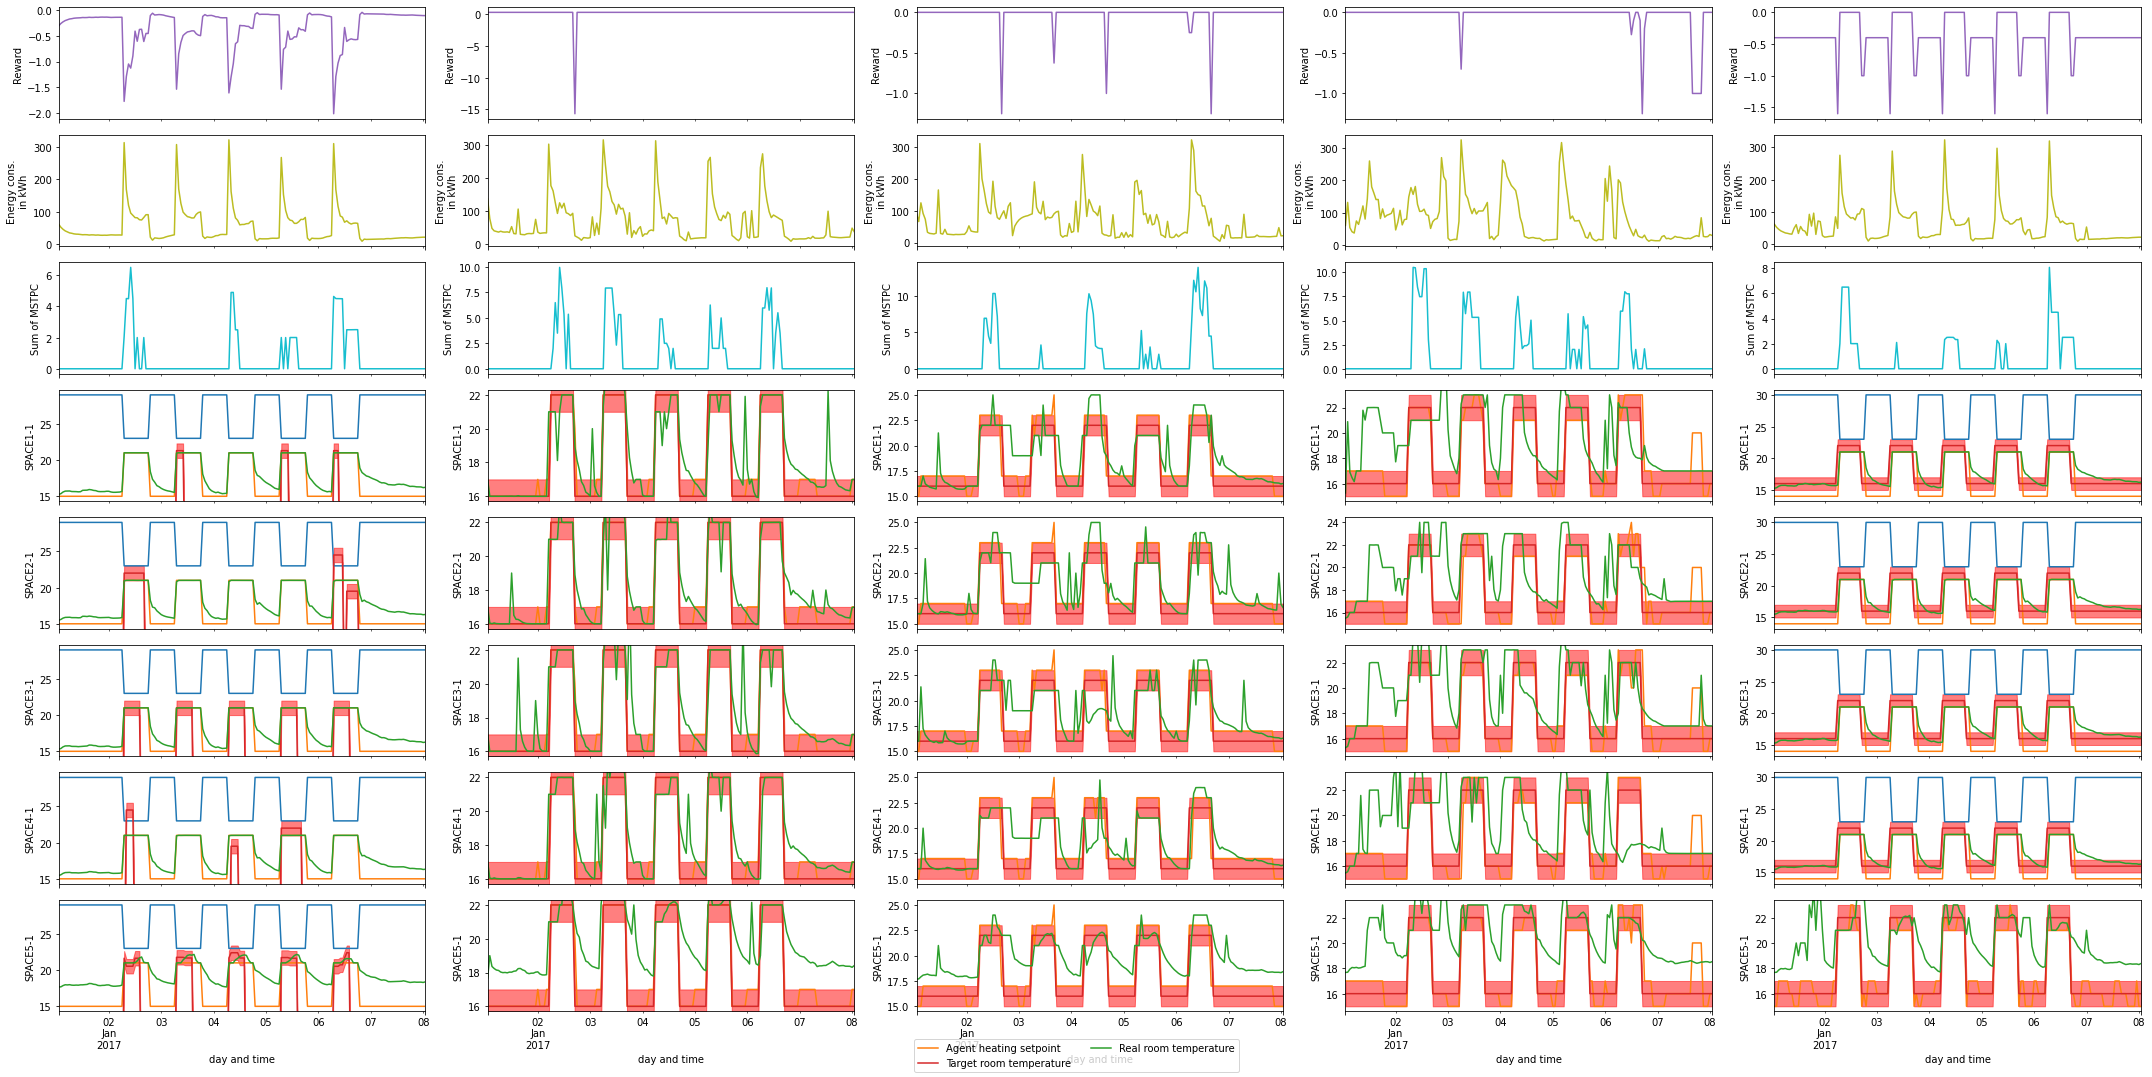

In [25]:
p, _ = vh.complete_plot_total_overview(subdfs, fig_width, subdfs_rooms, subdfs_agents)
p.show()

<h3>Details for a day</h3>

In [26]:
#selected_periods1    = [datetime.datetime(2017, 1, 3),
#                        datetime.datetime(2017, 1, 3),
#                        datetime.datetime(2017, 1, 3)]
#selected_periods1_end= [datetime.datetime(2017, 1, 4),
#                        datetime.datetime(2017, 1, 4),
#                        datetime.datetime(2017, 1, 4)]

In [27]:
if not "selected_periods1" in locals().keys():
    selected_periods1     = [datetime.datetime(2017, 1, 3) for _ in range(len(alldfs))]
if not "selected_periods1_end" in locals().keys():
    selected_periods1_end = [datetime.datetime(2017, 1, 4) for _ in range(len(alldfs))]

subdfs = vh.select_week_and_episode_with_end_for_dfs_list(
            alldfs,
            selected_episodes,
            selected_periods1,
            selected_periods1_end)

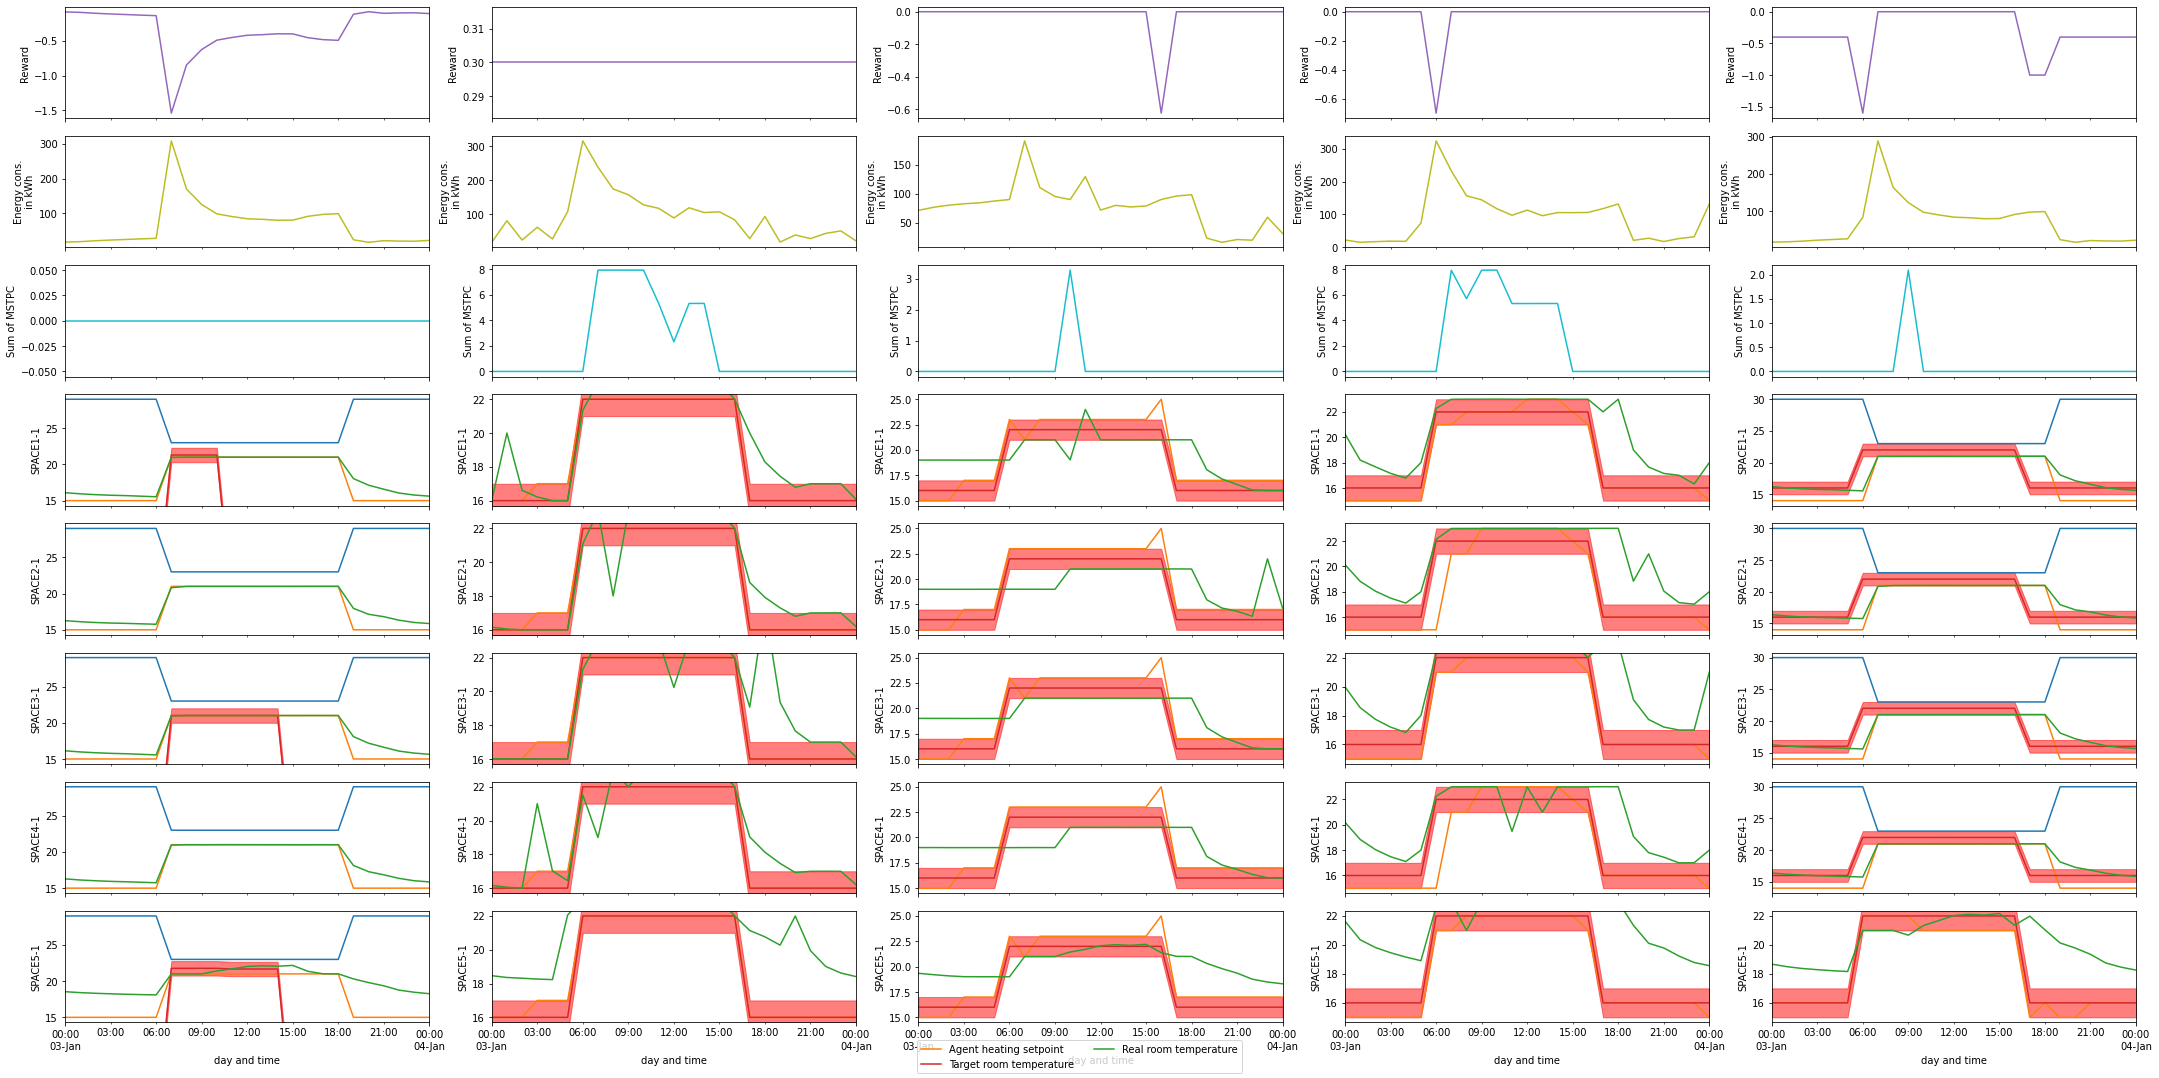

In [28]:
p, _ = vh.complete_plot_total_overview(subdfs, fig_width, subdfs_rooms, subdfs_agents)
p.show()

<h3>Details for a complete month</h3>

In [29]:
#selected_periods2    = [datetime.datetime(2017, 1, 1),
#                        datetime.datetime(2017, 1, 1),
#                        datetime.datetime(2017, 1, 1)]

In [30]:
if not "selected_periods2" in locals().keys():
    selected_periods2     = [datetime.datetime(2017, 1, 1) for _ in range(len(alldfs))]
selected_periods2_end = [datetime.datetime(2017, 1, 30) for _ in range(len(alldfs))]

subdfs = vh.select_week_and_episode_with_end_for_dfs_list(
            alldfs,
            selected_episodes,
            selected_periods2,
            selected_periods2_end)

For plot number 1, mean energy consumption =  52002.0 Wh, mean reward = -0.3174
For plot number 2, mean energy consumption =  66123.4 Wh, mean reward =  0.2770
For plot number 3, mean energy consumption =  65713.3 Wh, mean reward = -0.0256
For plot number 4, mean energy consumption =  77231.1 Wh, mean reward = -0.0505
For plot number 5, mean energy consumption =  55038.3 Wh, mean reward = -0.3564


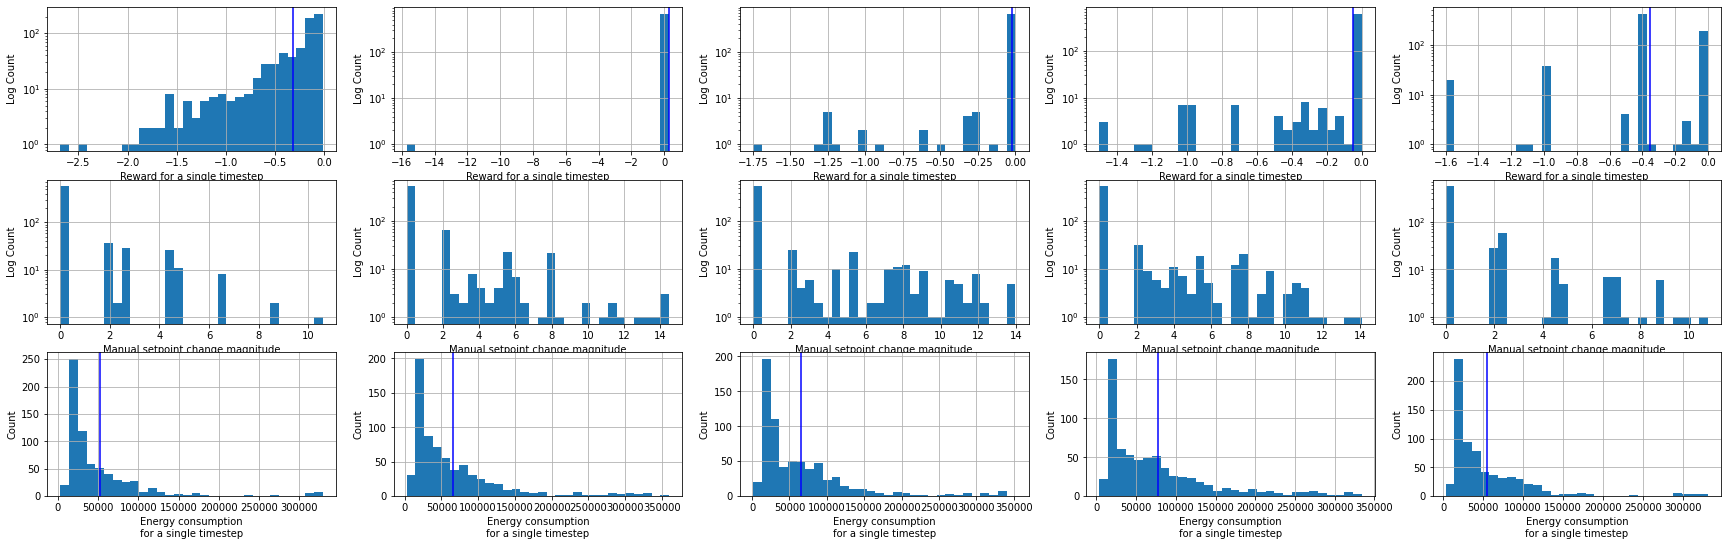

In [31]:
vh.plot_stpch_and_econs_distrib(subdfs, fig_width)

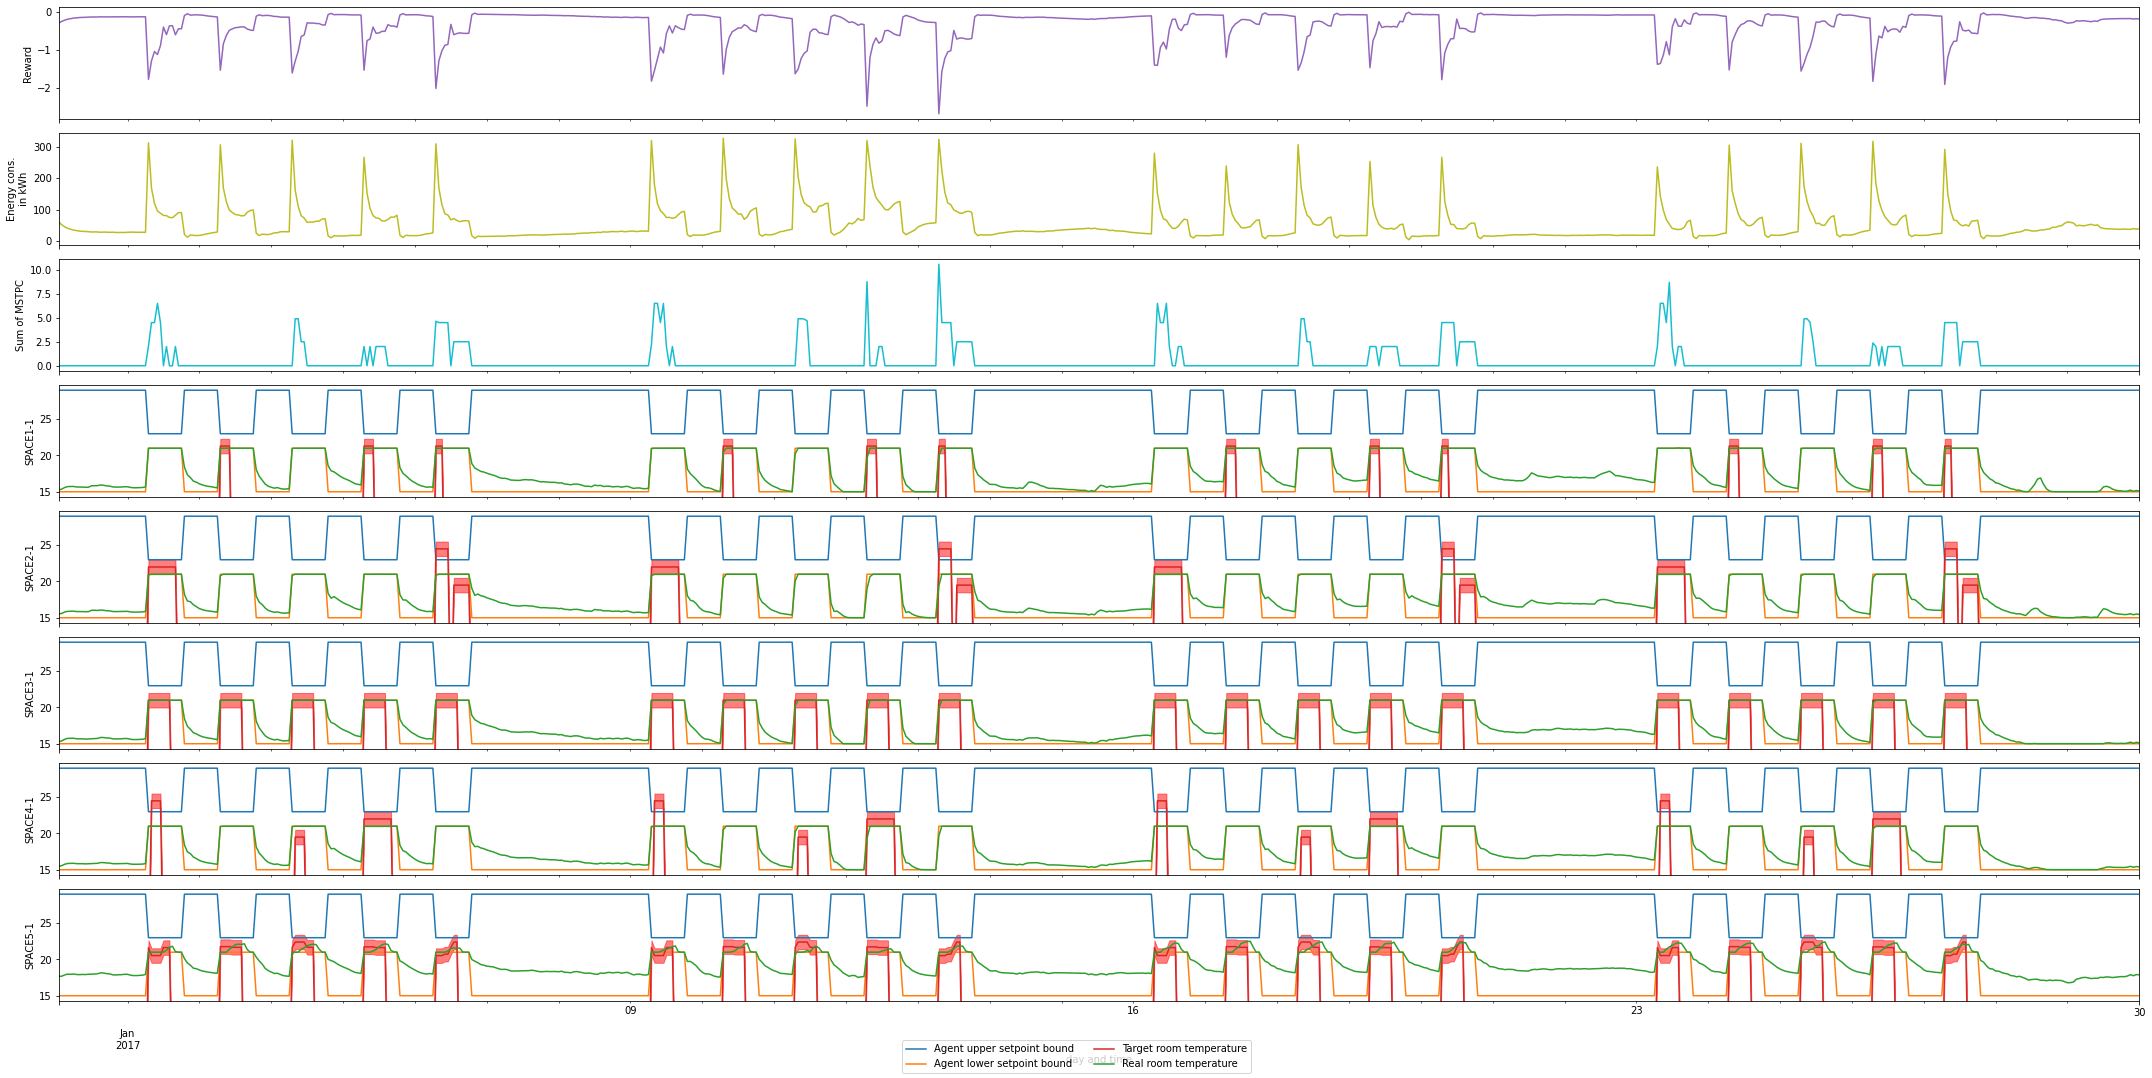

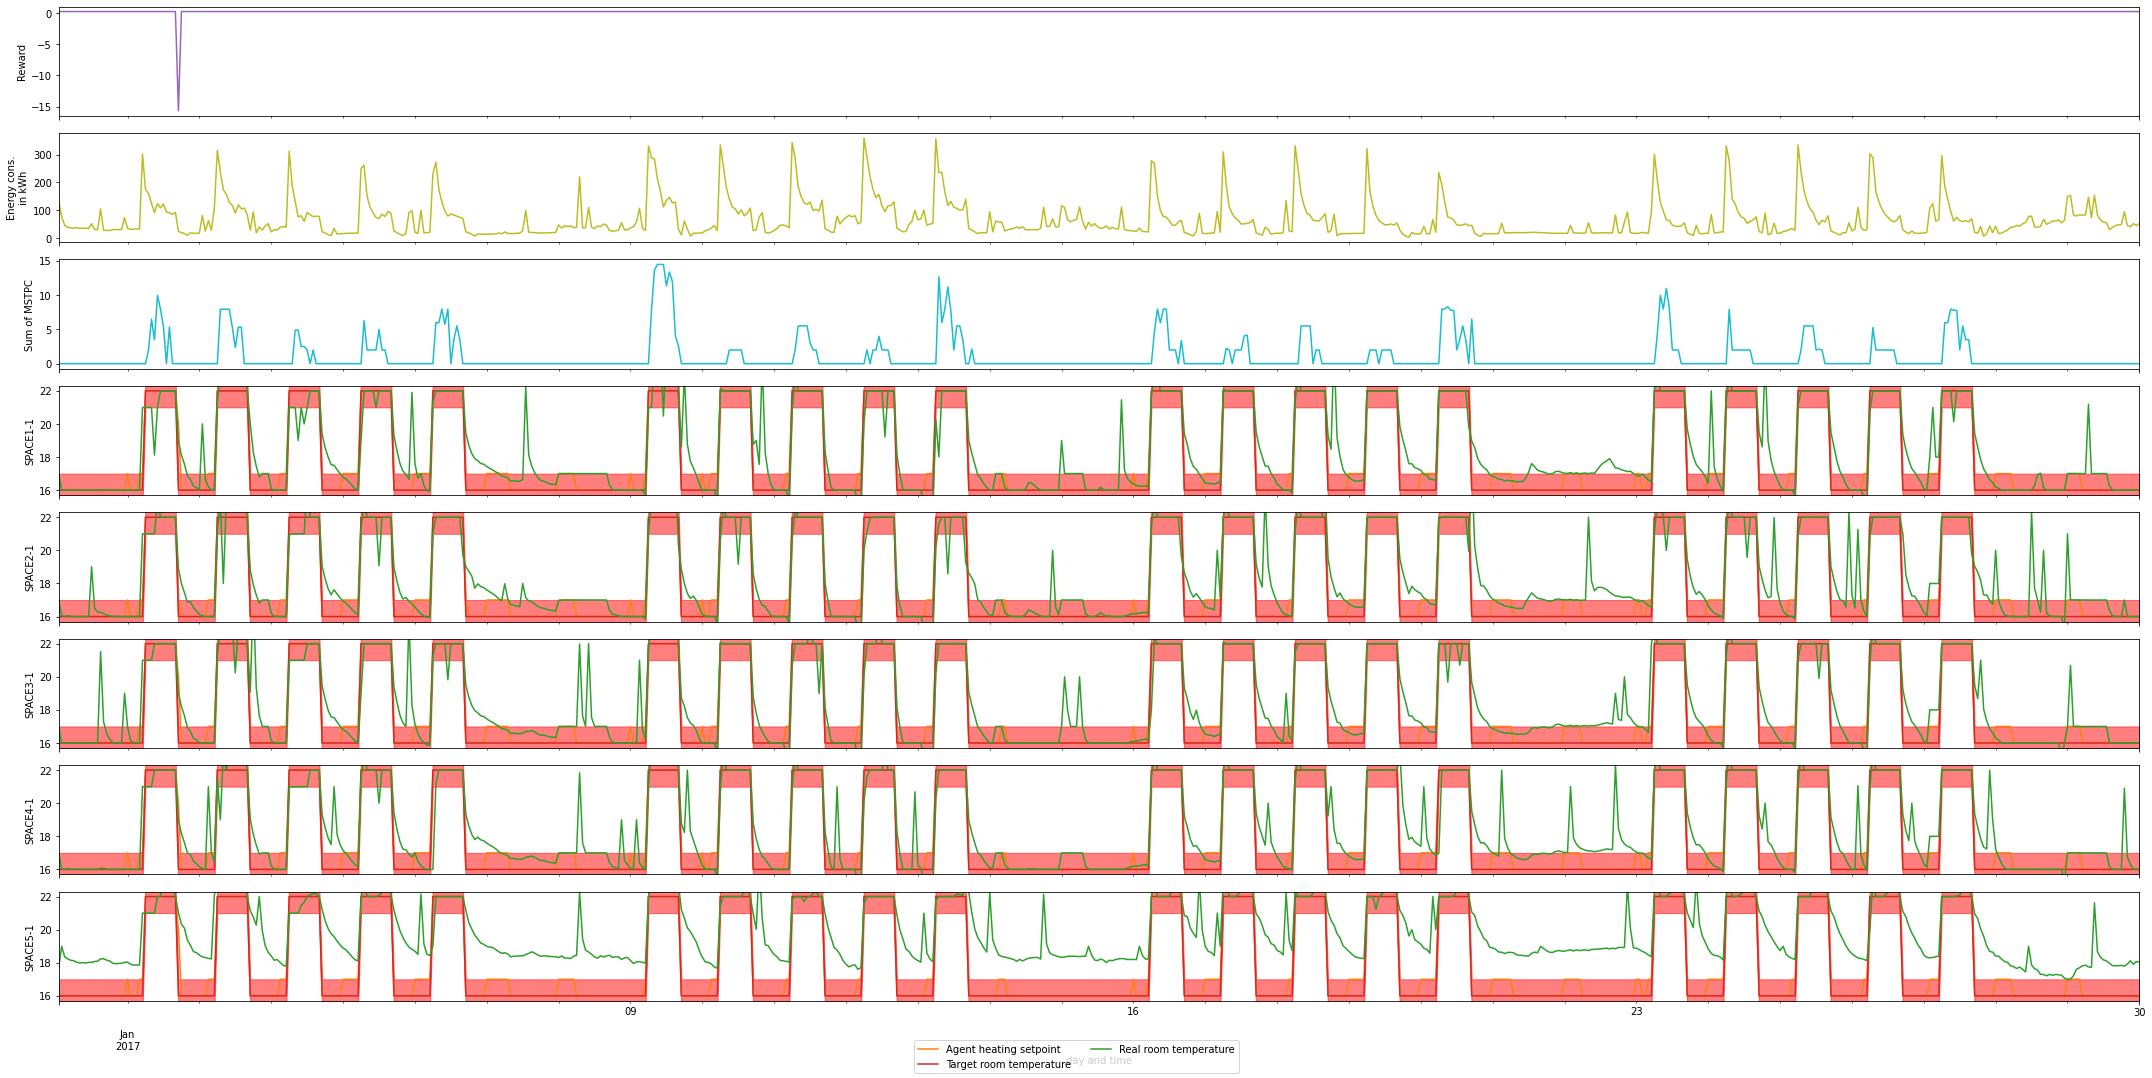

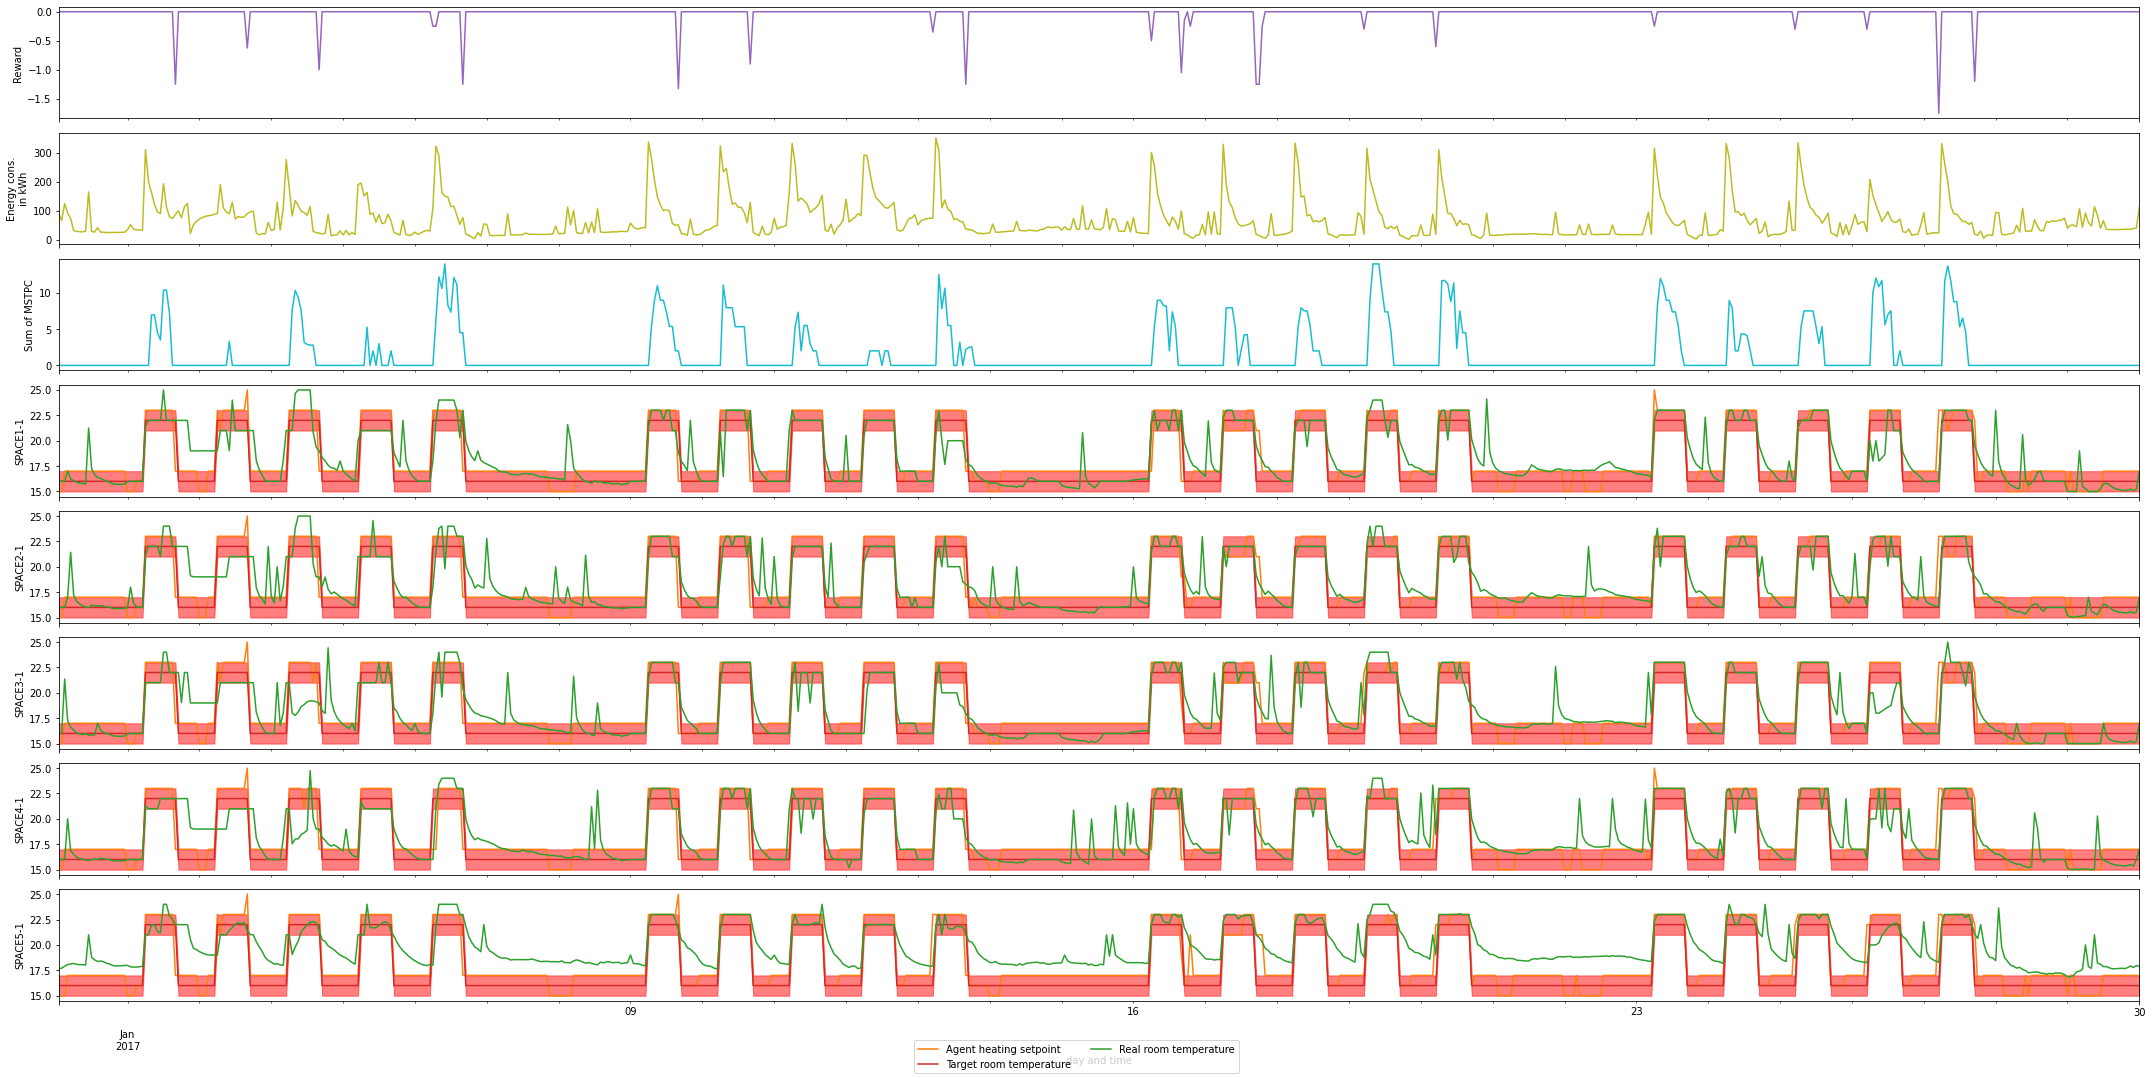

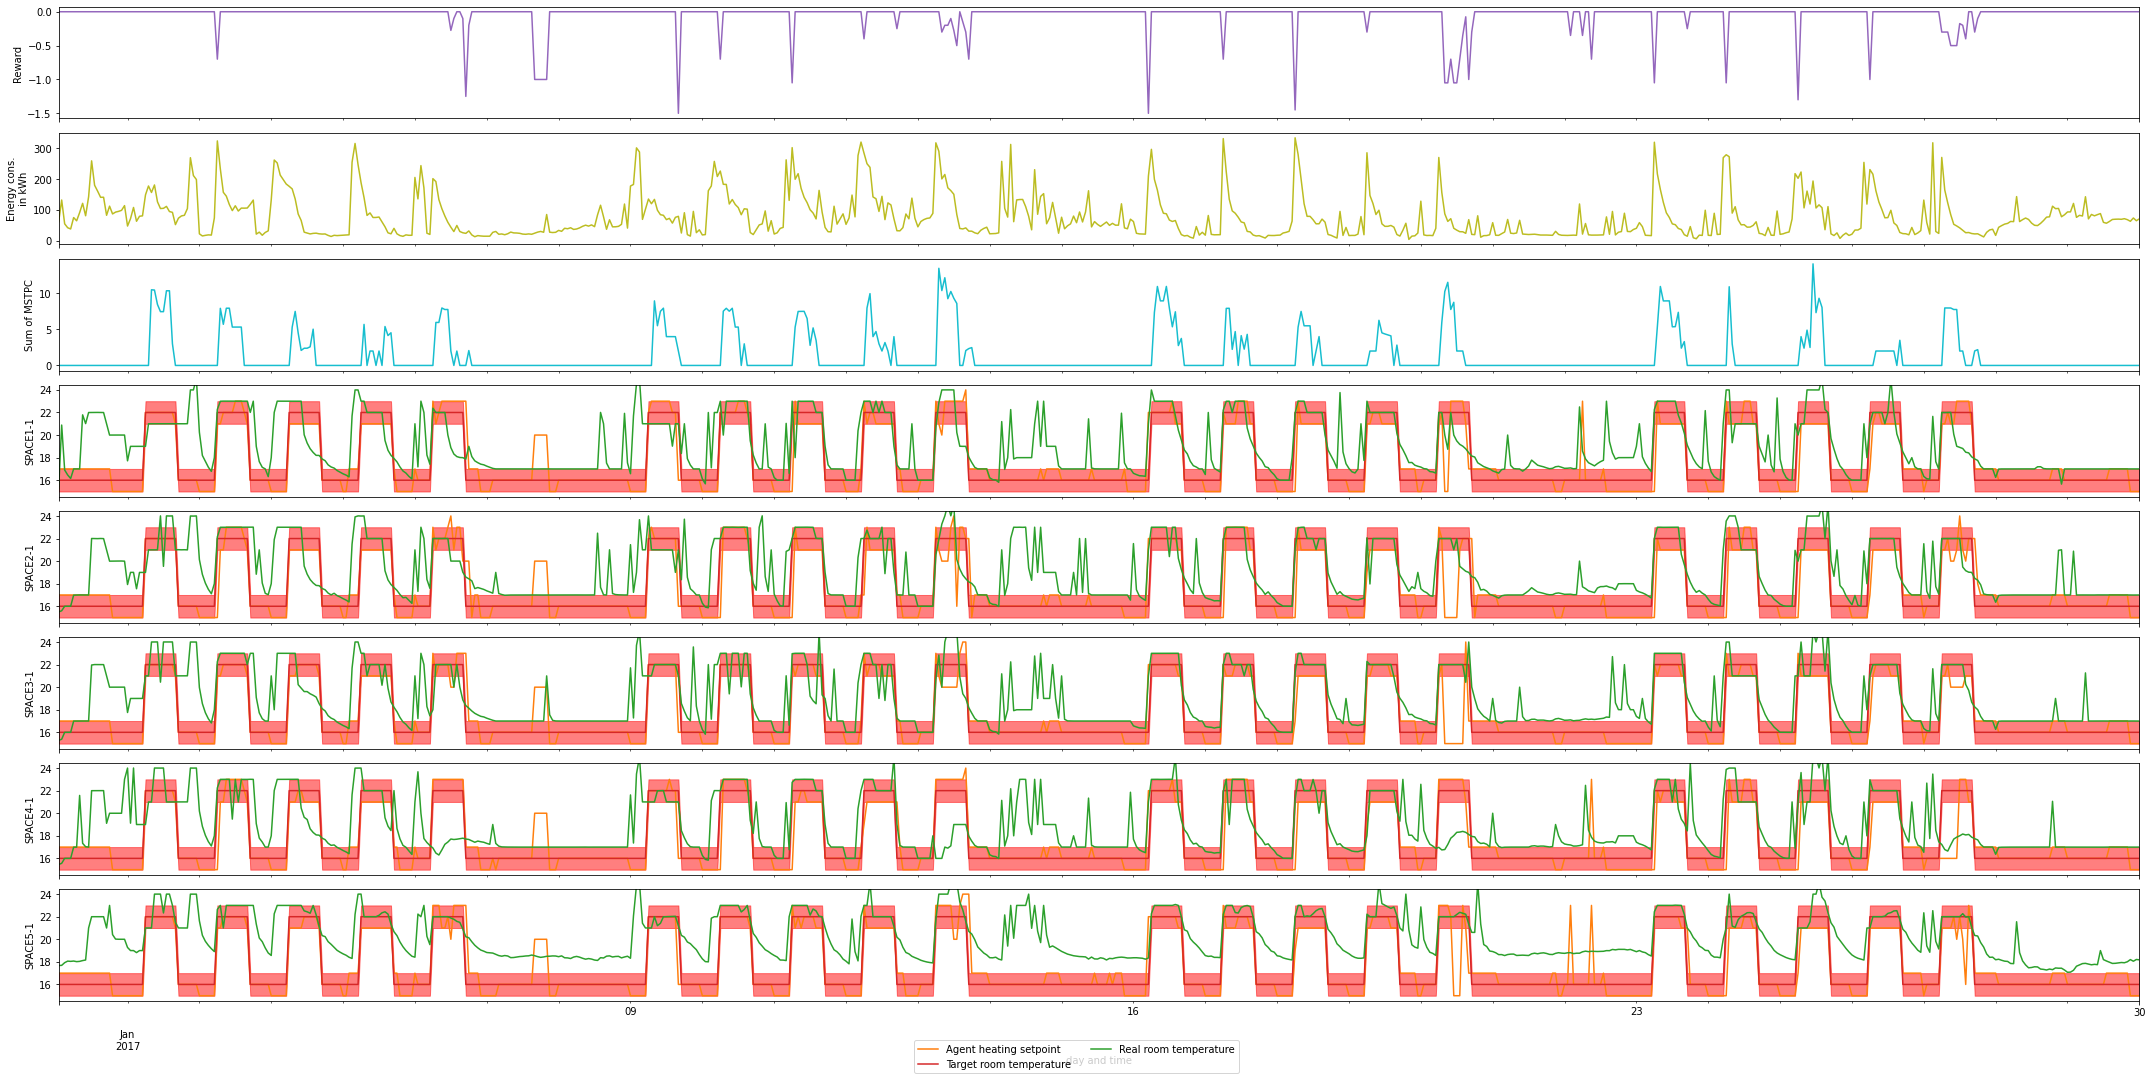

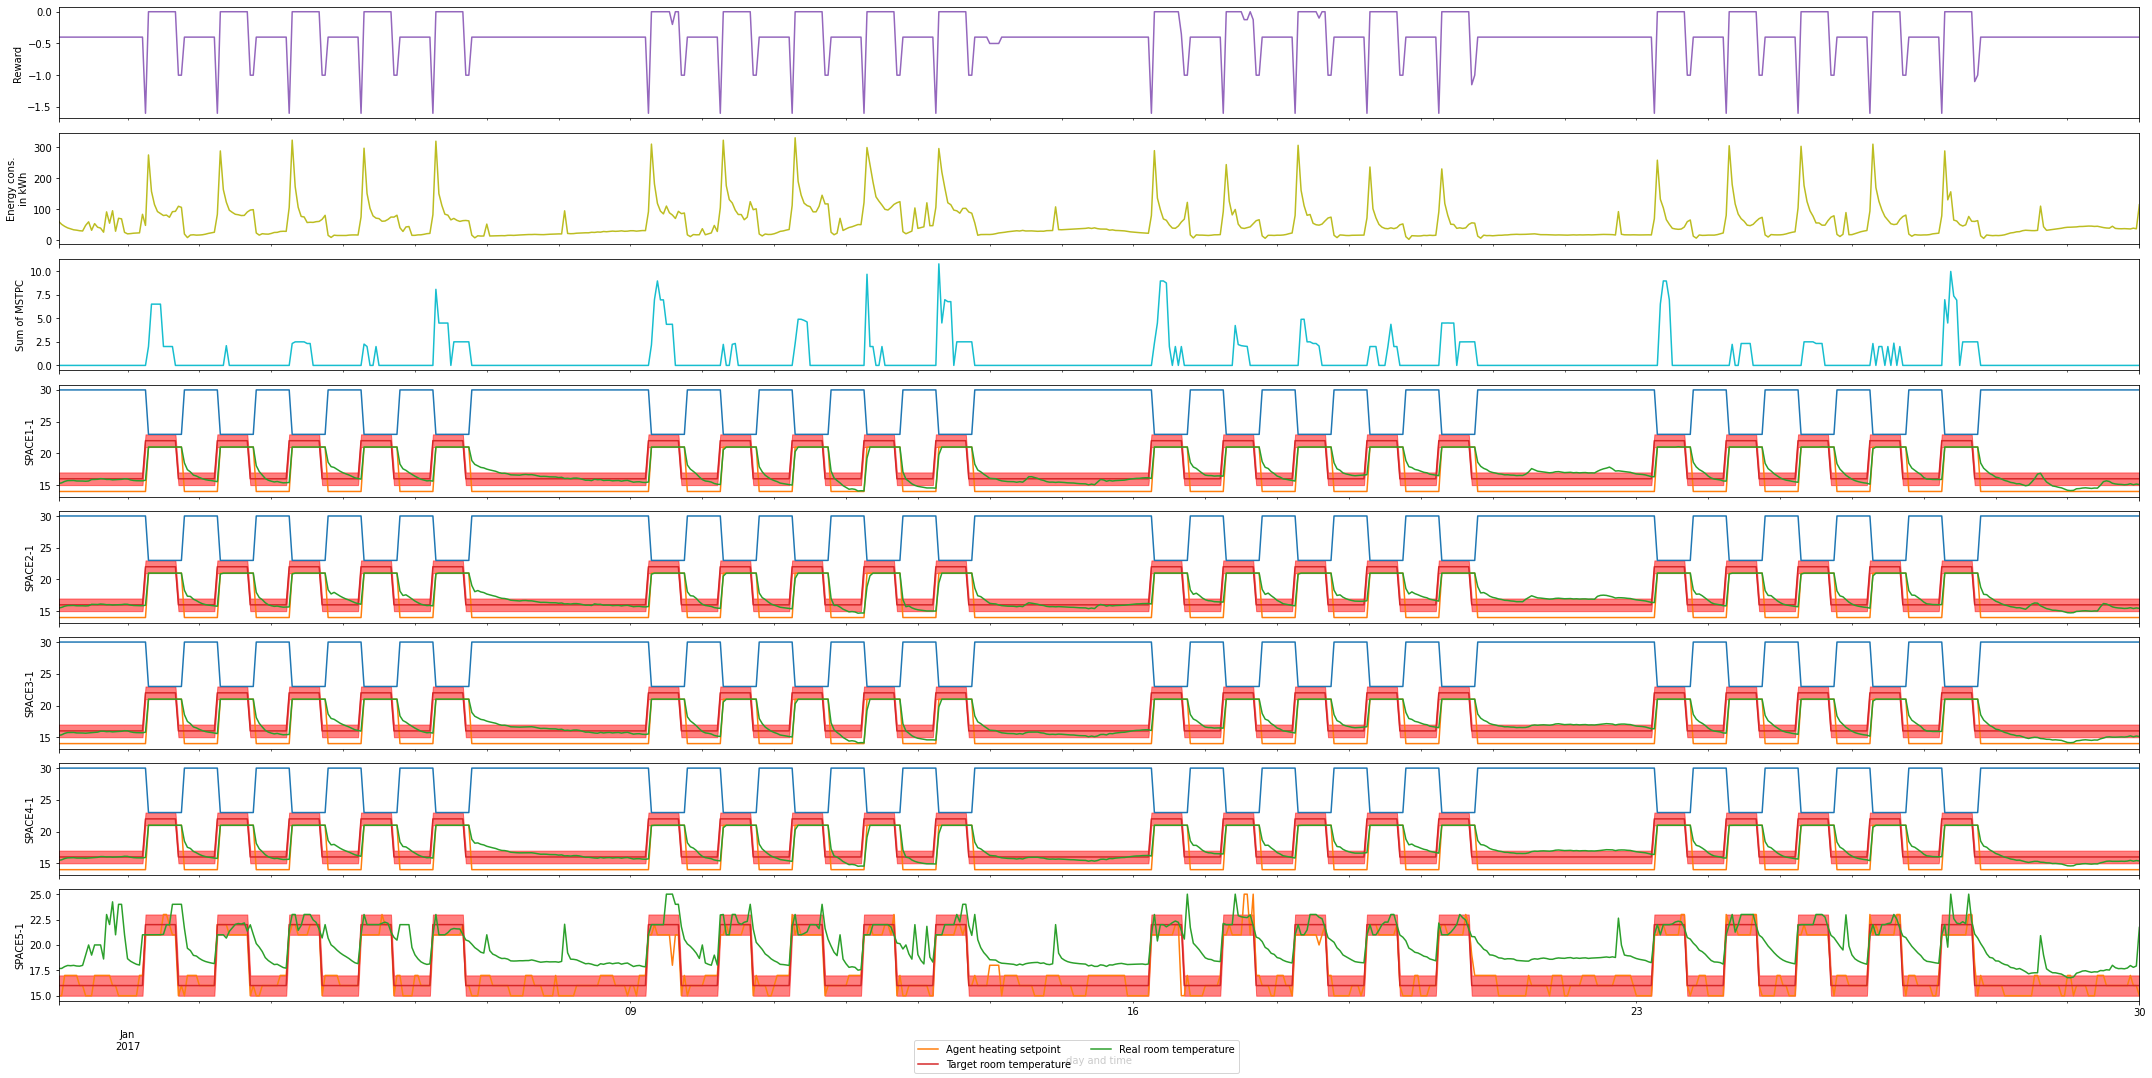

In [32]:
for idx, sdfs in enumerate(subdfs):
    p, _ = vh.complete_plot_total_overview(sdfs, fig_width,
                                           subdfs_rooms[idx],
                                           subdfs_agents[idx])
    p.show()

No q-values available for scenario 4: s109, agent 1
No q-values available for scenario 4: s109, agent 2
No q-values available for scenario 4: s109, agent 3
No q-values available for scenario 4: s109, agent 4


(<Figure size 2160x3456 with 32 Axes>,
 array([<AxesSubplot:ylabel='Scenario 1: s110\nAgent 0'>,
        <AxesSubplot:ylabel='Scenario 1: s110\nAgent 1'>,
        <AxesSubplot:ylabel='Scenario 1: s110\nAgent 2'>,
        <AxesSubplot:ylabel='Scenario 1: s110\nAgent 3'>,
        <AxesSubplot:ylabel='Scenario 1: s110\nAgent 4'>,
        <AxesSubplot:ylabel='Scenario 2: s110b\nAgent 0'>,
        <AxesSubplot:ylabel='Scenario 2: s110b\nAgent 1'>,
        <AxesSubplot:ylabel='Scenario 2: s110b\nAgent 2'>,
        <AxesSubplot:ylabel='Scenario 2: s110b\nAgent 3'>,
        <AxesSubplot:ylabel='Scenario 2: s110b\nAgent 4'>,
        <AxesSubplot:ylabel='Scenario 3: s110c\nAgent 0'>,
        <AxesSubplot:ylabel='Scenario 3: s110c\nAgent 1'>,
        <AxesSubplot:ylabel='Scenario 3: s110c\nAgent 2'>,
        <AxesSubplot:ylabel='Scenario 3: s110c\nAgent 3'>,
        <AxesSubplot:ylabel='Scenario 3: s110c\nAgent 4'>,
        <AxesSubplot:ylabel='Scenario 4: s109\nAgent 0'>], dtype=object))

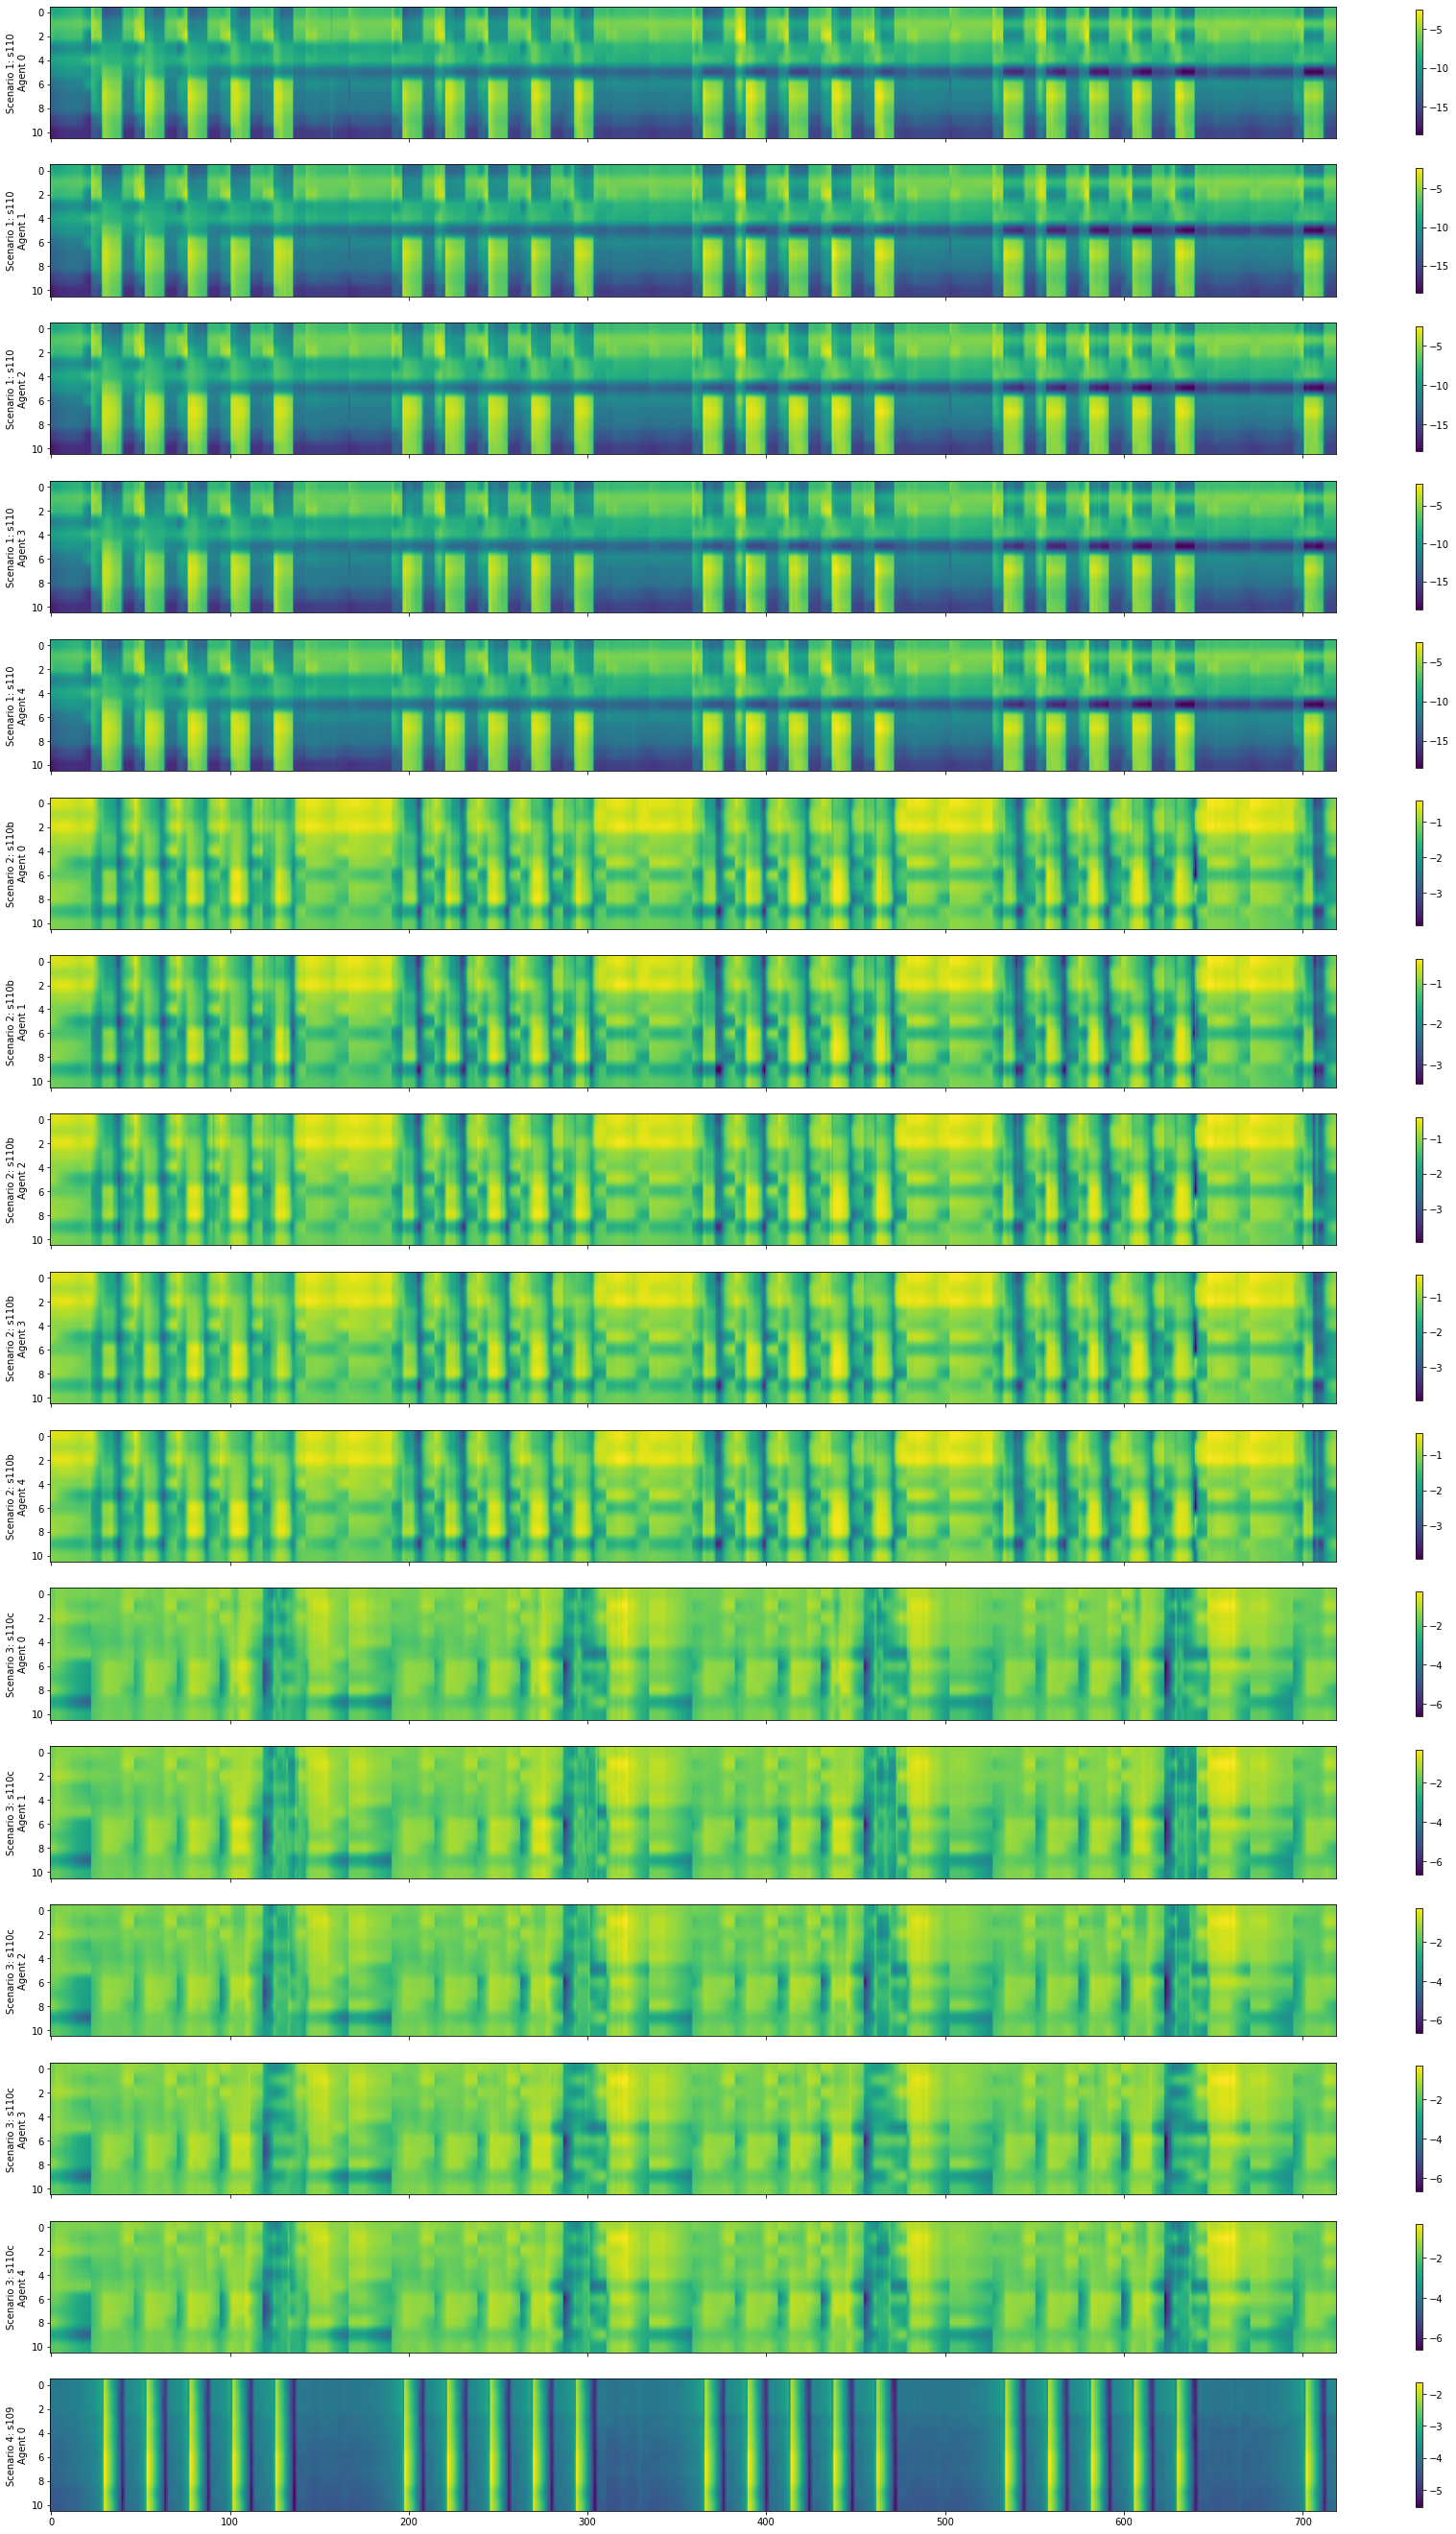

In [33]:
vh.plot_q_values(q_values, fig_width)

Outputs for thesis

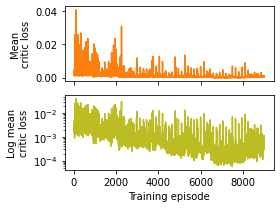

In [34]:
p, _ = vh.export_loss_plot(alldfs[-1])
p.tight_layout()
p.savefig("saved_plots/MA_s109_loss.png")
p.savefig("saved_plots/MA_s109_loss.pdf")

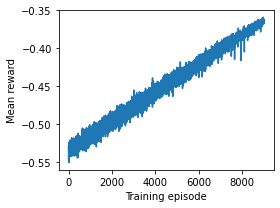

In [35]:
p, _ = vh.export_reward_plot(alldfs[-1])
p.tight_layout()
p.savefig("saved_plots/MA_s109_reward.png")
p.savefig("saved_plots/MA_s109_reward.pdf")

In [36]:
q_values.keys()

dict_keys(['0: b001', '1: s110', '2: s110b', '3: s110c', '4: s109'])

In [37]:
if not "selected_episodes" in locals().keys():
    selected_episodes = last_available_eval_episodes.copy()
if not "selected_weeks" in locals().keys():
    # the start of the evaluation episode
    selected_weeks = [datetime.datetime.strptime(dfs['sees'].iloc[0]["datetime"], "%Y-%m-%d %H:%M:%S")
                      for dfs in alldfs]

subdfs = vh.select_week_and_episode_for_dfs_list(alldfs, selected_episodes, selected_weeks)

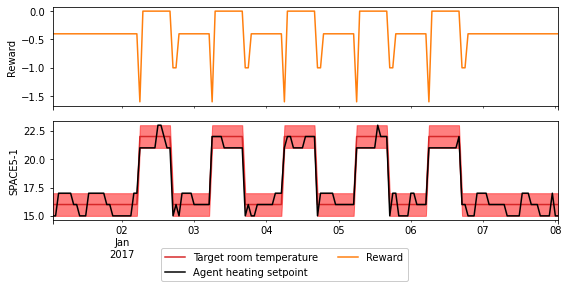

In [38]:
import matplotlib.lines as mlines

p, ax = plt.subplots(nrows=2, ncols=1, figsize=(8,4), sharex=True)
#vh.plot_sees_reward(subdfs[-1], ax[0])
subdfs[-1]["sees"].loc[:,   "reward"].plot(ax=ax[0], label="Reward", color="tab:orange")
ax[0].set_ylabel("Reward")
vh.plot_room_temp_agent_setpoint(dfs=subdfs[-1], room='SPACE5-1', agentid=0, ax=ax[1], fill_between=True, plot_room_temp=False, plot_target_temp_after_setpoints=False, heating_setpoint_color="k")
orange_patch = mlines.Line2D([], [], color='tab:orange', label='Reward', linestyle='-')
handles, labels = ax[1].get_legend_handles_labels()
handles.append(orange_patch)
labels.append("Reward")
p.tight_layout()
p.legend(handles, labels, loc='lower center', ncol=2, framealpha=1)
p.tight_layout()
p.savefig("saved_plots/MA_s109_TestWeek_rwd_actions.png")
p.savefig("saved_plots/MA_s109_TestWeek_rwd_actions.pdf")

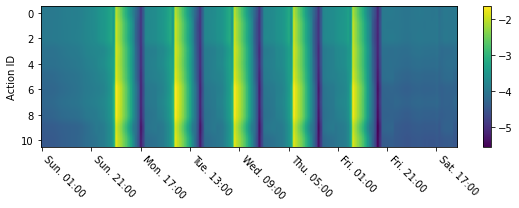

In [44]:
plt.figure(figsize=(8,3))
number_steps = subdfs[-1]["sees"].shape[0]
plotdata = q_values['4: s109'][0][:,0,:].T
im = plt.imshow(plotdata[:,0:number_steps], aspect='auto')
xt = plt.xticks()[0][1:-1]
xt_val = [subdfs[-1]["sees"].index[int(i)].strftime("%a. %H:%M") for i in xt ]
plt.xticks(xt, xt_val, rotation=-45, ha="left")
plt.ylabel("Action ID")
cbar = p.colorbar(im, ax=plt.gca(), location='right')
plt.tight_layout()
plt.savefig("saved_plots/MA_s109_TestWeek_Q_vals.png")
plt.savefig("saved_plots/MA_s109_TestWeek_Q_vals.pdf")

In [ ]:
#S110 follows now

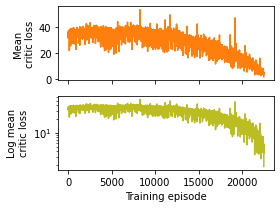

In [45]:
p, _ = vh.export_loss_plot(alldfs[1])
p.tight_layout()
#p.savefig("saved_plots/MA_s110_loss.png")
#p.savefig("saved_plots/MA_s110_loss.pdf")

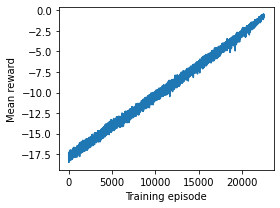

In [46]:
p, _ = vh.export_reward_plot(alldfs[1])
p.tight_layout()
#p.savefig("saved_plots/MA_s110_reward.png")
#p.savefig("saved_plots/MA_s110_reward.pdf")

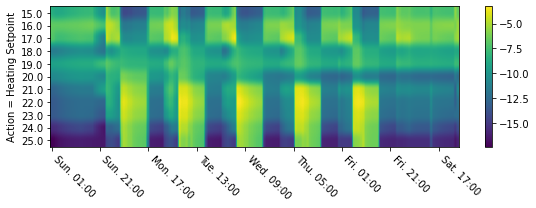

In [47]:
plt.figure(figsize=(8,3))
number_steps = subdfs[-1]["sees"].shape[0]
plotdata = q_values['1: s110'][0][:,:].T
im = plt.imshow(plotdata[:,0:number_steps], aspect='auto')
xt = plt.xticks()[0][1:-1]
xt_val = [subdfs[-1]["sees"].index[int(i)].strftime("%a. %H:%M") for i in xt ]
plt.xticks(xt, xt_val, rotation=-45, ha="left")
cbar = plt.colorbar(im, ax=plt.gca(), location='right')
plt.ylabel("Action = Heating Setpoint")
plt.yticks(np.arange(0,11,1), np.linspace(15,25,11))
plt.tight_layout()
#plt.savefig("saved_plots/MA_s110_TestWeek_Q_vals.png")
#plt.savefig("saved_plots/MA_s110_TestWeek_Q_vals.pdf")

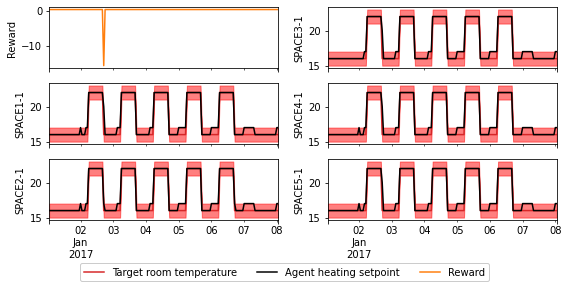

In [48]:
import matplotlib.lines as mlines

p, ax = plt.subplots(nrows=3, ncols=2, figsize=(8,4), sharex=True)
#vh.plot_sees_reward(subdfs[-1], ax[0])
subdfs[1]["sees"].loc[:,   "reward"].plot(ax=ax[0,0], label="Reward", color="tab:orange")
ax[0,0].set_ylabel("Reward")
vh.plot_room_temp_agent_setpoint(dfs=subdfs[1], room='SPACE1-1', agentid=0, ax=ax[1,0], fill_between=True, plot_room_temp=False, plot_target_temp_after_setpoints=False, heating_setpoint_color="k")
orange_patch = mlines.Line2D([], [], color='tab:orange', label='Reward', linestyle='-')
handles, labels = ax[1,0].get_legend_handles_labels()
handles.append(orange_patch)
labels.append("Reward")
vh.plot_room_temp_agent_setpoint(dfs=subdfs[1], room='SPACE2-1', agentid=1, ax=ax[2,0], fill_between=True, plot_room_temp=False, plot_target_temp_after_setpoints=False, heating_setpoint_color="k")
vh.plot_room_temp_agent_setpoint(dfs=subdfs[1], room='SPACE3-1', agentid=2, ax=ax[0,1], fill_between=True, plot_room_temp=False, plot_target_temp_after_setpoints=False, heating_setpoint_color="k")
vh.plot_room_temp_agent_setpoint(dfs=subdfs[1], room='SPACE4-1', agentid=3, ax=ax[1,1], fill_between=True, plot_room_temp=False, plot_target_temp_after_setpoints=False, heating_setpoint_color="k")
vh.plot_room_temp_agent_setpoint(dfs=subdfs[1], room='SPACE5-1', agentid=4, ax=ax[2,1], fill_between=True, plot_room_temp=False, plot_target_temp_after_setpoints=False, heating_setpoint_color="k")
p.tight_layout()
p.legend(handles, labels, loc='lower center', ncol=3, framealpha=1)
p.tight_layout()
#p.savefig("saved_plots/MA_s110_TestWeek_rwd_actions.png")
#p.savefig("saved_plots/MA_s110_TestWeek_rwd_actions.pdf")